In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

Steve Reynard Prasetyo - 0706022310027

# Exploratory Data Analysis

In [23]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv "
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [24]:
print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [26]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [27]:
print("Missing values before handling:")
print(df.isnull().sum())

# Given 'Other names' is a descriptive column, we can fill missing values with 'Unknown'
df['Other names'].fillna('Unknown', inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

Missing values after handling:
Country                    0
Other names                0
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64


/tmp/ipython-input-4085950934.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [28]:
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


Dataset COVID-19 dengan 225 baris dan 10 kolom berhasil dimuat tanpa masalah. Dari pengecekan awal, terlihat bahwa tipe datanya bercampur: beberapa kolom bertipe object (kategori), lalu ada int64 untuk hitungan angka, dan float64 untuk persentase. Ditemukan satu missing value di kolom ‘Other names’, dan itu sudah ditangani dengan mengisi nilai ‘Unknown’. Selain itu, tidak ada duplikasi baris dalam dataset, jadi cukup bersih dari sisi tersebut.

Sekarang dataset sudah rapi dari segi missing value dan duplikasi, sehingga siap dipakai untuk analisis berikutnya. Langkah penting selanjutnya adalah mengecek lagi apakah tipe data tiap kolom sudah sesuai untuk analisis statistik. Ada kemungkinan beberapa angka masih tersimpan sebagai object, atau ada kolom seperti ‘Death percentage’ yang perlu dipastikan formatnya benar (misalnya apakah sudah berupa persentase yang tepat). Dengan merapikan tipe data, analisis selanjutnya bisa lebih akurat dan mudah dilakukan.

In [29]:
import plotly.express as px
print("plotly.express imported as px.")

plotly.express imported as px.


In [30]:
import plotly.express as px

fig = px.choropleth(df,
                    locations='ISO 3166-1 alpha-3 CODE',
                    color='Total Cases',
                    hover_name='Country',
                    projection='natural earth',
                    title='COVID-19 Total Cases by Country',
                    color_continuous_scale='Turbo') # Added contrasting color scale

fig.show()

Geomap tersebut menampilkan distribusi total kasus COVID-19 di seluruh dunia, dengan gradasi warna yang menunjukkan tingkat keparahan kasus pada tiap negara. Negara-negara dengan warna paling gelap, seperti Amerika Serikat, India, Brasil, serta beberapa negara Eropa, memiliki jumlah kasus yang sangat tinggi. Rusia dan sejumlah negara di kawasan Asia Timur serta Eropa Timur juga menunjukkan angka kasus yang besar. Sementara itu, sebagian besar negara di Afrika tampak berwarna lebih terang, menandakan jumlah kasus yang relatif lebih rendah dibandingkan benua lainnya. Negara-negara Asia Tenggara, termasuk Indonesia, berada pada kategori menengah. Secara keseluruhan, peta ini memperlihatkan adanya ketimpangan penyebaran kasus secara global, di mana negara dengan populasi besar atau mobilitas tinggi cenderung mencatat total kasus yang lebih besar.

In [31]:
continent_cases = df.groupby('Continent')['Total Cases'].sum().reset_index()

fig = px.bar(
    continent_cases,
    x='Continent',
    y='Total Cases',
    title='Total COVID-19 Cases by Continent',
    labels={'Total Cases': 'Total Cases'},
    color='Continent'
)
fig.update_layout(xaxis_title='Continent', yaxis_title='Total Cases')
fig.show()


Bar chart tersebut menunjukkan total kasus COVID-19 yang tercatat di masing-masing benua. Dari grafik terlihat bahwa Eropa memiliki jumlah kasus tertinggi, mencapai sekitar 180 juta kasus, menjadikannya wilayah dengan beban pandemi terbesar secara keseluruhan. Asia menyusul di posisi kedua dengan total kasus sekitar 140 juta, merefleksikan penyebaran yang sangat luas di wilayah berpenduduk terbesar di dunia. Di urutan selanjutnya terdapat Northern America dan Latin America and the Caribbean, masing-masing dengan sekitar 85 juta dan 68 juta kasus. Kedua kawasan ini juga menghadapi dampak signifikan sepanjang pandemi. Sementara itu, Africa dan Oceania menunjukkan total kasus yang jauh lebih rendah dibanding benua lainnya—sekitar 12 juta untuk Afrika dan 6 juta untuk Oseania—yang dapat dipengaruhi oleh berbagai faktor seperti populasi, kapasitas testing, pelaporan, maupun kondisi geografis. Secara keseluruhan, grafik ini memperlihatkan adanya perbedaan besar dalam jumlah kasus antar-benua, menggambarkan bagaimana tingkat penyebaran COVID-19 tidak merata di seluruh dunia.

In [32]:
fig = px.scatter(
    df,
    x='Tot\xa0Cases//1M pop',
    y='Tot\xa0Deaths/1M pop',
    color='Continent',
    hover_name='Country',
    title='COVID-19 Impact: Total Cases vs. Total Deaths per 1M Population by Continent',
    labels={
        'Tot\xa0Cases//1M pop': 'Total Cases per 1M Population',
        'Tot\xa0Deaths/1M pop': 'Total Deaths per 1M Population'
    }
)
fig.show()

Scatter plot tersebut menunjukkan hubungan antara Total Cases per 1 Million Population dan Total Deaths per 1 Million Population akibat COVID-19 di berbagai negara, dikelompokkan berdasarkan benua. Titik-titik data memperlihatkan bahwa terdapat pola hubungan positif yang cukup jelas: negara-negara dengan jumlah kasus per satu juta penduduk yang lebih tinggi cenderung memiliki jumlah kematian per satu juta penduduk yang lebih tinggi pula. Namun, pola ini tidak sepenuhnya linier karena terdapat variasi luas antarnegara dan antar-benua yang menunjukkan perbedaan dalam kapasitas kesehatan, tingkat testing, serta strategi penanganan pandemi.

Secara visual, negara-negara di Eropa terlihat mendominasi area dengan kasus dan kematian yang tinggi, menandakan bahwa benua ini mengalami beban pandemi yang lebih besar dibanding wilayah lain. Banyak titik Eropa berada di bagian kanan atas grafik, menunjukkan kombinasi high cases dan high deaths per 1M population. Sebaliknya, negara-negara di Asia dan Afrika cenderung terkonsentrasi di bagian kiri bawah grafik, yang berarti mereka memiliki kasus dan kematian per satu juta penduduk yang lebih rendah. Faktor penyebabnya dapat mencakup populasi lebih muda, variasi strategi testing, atau pelaporan yang berbeda antarwilayah.

Negara-negara di Latin America and the Caribbean menempati rentang tengah hingga tinggi, mencerminkan dampak pandemi yang cukup berat di kawasan ini, sementara Oceania berada paling rendah pada kedua sumbu, menandakan penyebaran kasus yang lebih terbatas dan tingkat kematian yang relatif kecil. Northern America (yang hanya mencakup sedikit negara) menunjukkan variasi tetapi tetap berada dalam kisaran menengah hingga tinggi pada metrik tersebut.

Secara keseluruhan, grafik ini mengonfirmasi bahwa tingkat kasus dan kematian COVID-19 berkaitan erat, namun pola per benua menunjukkan adanya perbedaan struktural dalam respons pandemi, kualitas sistem kesehatan, dan dinamika penyebaran yang memengaruhi hasil di masing-masing wilayah dunia.

In [33]:
fig = px.histogram(df, x='Death percentage',
                   title='Distribution of Death Percentage',
                   labels={'Death percentage': 'Death Percentage'})
fig.show()

Histogram tersebut menunjukkan distribusi persentase kematian akibat COVID-19 di berbagai negara, memperlihatkan seberapa sering tingkat fatalitas tertentu terjadi di seluruh dunia. Sebagian besar negara memiliki persentase kematian yang sangat rendah, yakni berada pada kisaran 0–2%, terlihat dari batang histogram yang paling tinggi pada rentang ini. Hal ini menunjukkan bahwa mayoritas negara mengalami tingkat fatalitas yang rendah dibandingkan dengan jumlah kasus terkonfirmasi. Setelah melewati batas 2%, jumlah negara yang memiliki persentase kematian lebih tinggi menurun drastis, dan hanya sedikit negara yang berada pada rentang 2–4%. Selain itu, terdapat beberapa outlier ekstrem dengan persentase kematian sekitar 8%, 10%, hingga mencapai 18%. Negara-negara ini jumlahnya sangat sedikit dan kemungkinan memiliki kondisi khusus seperti pelaporan kasus yang kurang akurat, kapasitas layanan kesehatan yang terbatas, deteksi kasus yang terlambat, atau perbedaan strategi pengujian.

Distribusi pada histogram juga menunjukkan kemiringan ke kanan (right-skewed), yang berarti sebagian besar negara berada pada persentase kematian rendah, sementara sebagian kecil negara dengan nilai yang jauh lebih tinggi menarik ekor distribusi ke arah kanan. Secara keseluruhan, meskipun rentang persentase kematian cukup lebar—mulai dari 0% hingga 18%—konsentrasi utama tetap berada pada nilai rendah. Temuan ini mengindikasikan bahwa secara global, tingkat kematian COVID-19 cenderung rendah di sebagian besar negara, namun terdapat beberapa negara yang menghadapi tantangan signifikan sehingga menunjukkan angka fatalitas yang jauh lebih tinggi.

In [34]:
df_encoded = pd.get_dummies(df, columns=['Continent'], prefix='Continent')
df = df_encoded
print("DataFrame after one-hot encoding 'Continent' column:")
df.head()

DataFrame after one-hot encoding 'Continent' column:


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent_Africa,Continent_Asia,Continent_Europe,Continent_Latin America and the Caribbean,Continent_Northern America,Continent_Oceania
0,Afghanistan,Afghanistan,AFG,40462186,177827,7671,4395,190,4.313743,False,True,False,False,False,False
1,Albania,Albania,ALB,2872296,273870,3492,95349,1216,1.275058,False,False,True,False,False,False
2,Algeria,Algeria,DZA,45236699,265691,6874,5873,152,2.587216,True,False,False,False,False,False
3,Andorra,Andorra,AND,77481,40024,153,516565,1975,0.382271,False,False,True,False,False,False
4,Angola,Angola,AGO,34654212,99194,1900,2862,55,1.915438,True,False,False,False,False,False


In [35]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns to be scaled
numerical_cols = [
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot\xa0Cases//1M pop',
    'Tot\xa0Deaths/1M pop',
    'Death percentage'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after applying StandardScaler to numerical columns:")
df.head()

# Define X_clust after scaling and encoding
continent_encoded_cols = [col for col in df.columns if col.startswith('Continent_')]
X_clust = df[numerical_cols + continent_encoded_cols]

DataFrame after applying StandardScaler to numerical columns:


# K-Means Clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definisikan kolom numerik yang akan di-scale
numerical_cols = [
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot\xa0Cases//1M pop',
    'Tot\xa0Deaths/1M pop',
    'Death percentage'
]

# Definisikan X_clust setelah scaling dan encoding
continent_encoded_cols = [col for col in df.columns if col.startswith('Continent_')]
X_clust = df[numerical_cols + continent_encoded_cols]

# Atur jumlah cluster optimalnya jadi 4
optimal_clusters = 4

# 1. Inisialisasi model KMeans dengan n_clusters=4 dan random_state=42
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')

# 2. Latih model KMeans ke DataFrame X_clust
kmeans_model.fit(X_clust)

# 3. Prediksi label cluster dan simpan di kolom baru namanya KMeans_Cluster di DataFrame df asli kita
df['KMeans_Cluster'] = kmeans_model.labels_

# 4. Hitung silhouette score buat clustering KMeans ini
silhouette_avg_kmeans = silhouette_score(X_clust, kmeans_model.labels_)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans}")

Silhouette Score for KMeans Clustering: 0.32250561588702026


In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 1. Bikin model Agglomerative Clustering-nya, pake 2 cluster, linkage 'complete', dan metric 'euclidean'
hierarchical_model = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')

# 2. Latih model Hierarchical Agglomerative Clustering ini pake data X_clust
hierarchical_model.fit(X_clust)

# 3. Prediksi label clusternya terus simpan di kolom baru namanya Hierarchical_Cluster di DataFrame df kita
df['Hierarchical_Cluster'] = hierarchical_model.labels_

# 4. Hitung silhouette score buat clustering Hierarchical Agglomerative ini
silhouette_avg_hierarchical = silhouette_score(X_clust, hierarchical_model.labels_)
print(f"Silhouette Score for Hierarchical Agglomerative Clustering: {silhouette_avg_hierarchical}")

Silhouette Score for Hierarchical Agglomerative Clustering: 0.8086200604892986


/tmp/ipython-input-46835608.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




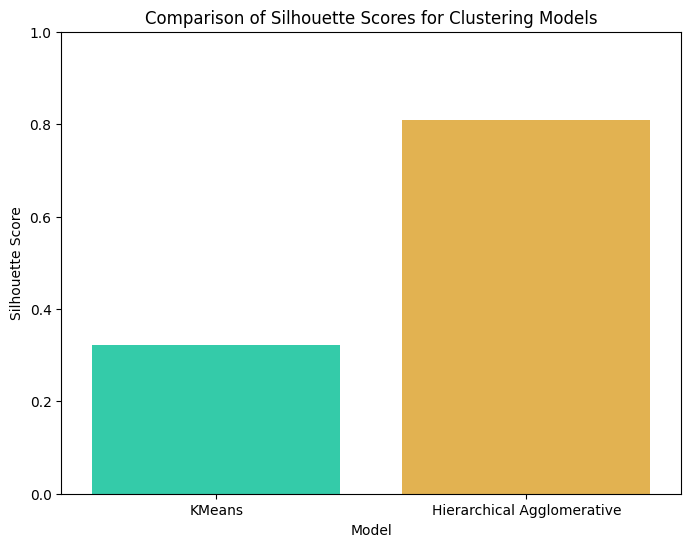

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsi silhouette_avg_kmeans dan silhouette_avg_hierarchical sudah ada di kernel
# Kalau belum, mungkin perlu jalankan lagi sel yang menghitungnya.

models = ['KMeans', 'Hierarchical Agglomerative']
silhouette_scores = [silhouette_avg_kmeans, silhouette_avg_hierarchical]

df_scores = pd.DataFrame({
    'Model': models,
    'Silhouette Score': silhouette_scores
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Silhouette Score', data=df_scores, palette='turbo')
plt.title('Comparison of Silhouette Scores for Clustering Models')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1) # Silhouette scores itu rentangnya dari -1 sampai 1
plt.show()

KMeans Mean Summary for Plotting:
              Metric  Cluster 0  Cluster 1  Cluster 2  Cluster 3
0         Population  -0.002741  -0.181613  -0.045711   4.434157
1        Total Cases  -0.219449   0.089804   0.073515   6.809855
2       Total Deaths  -0.217976  -0.096420   0.430684   7.266643
3  Tot Cases//1M pop  -0.624803   1.354234  -0.210331   0.009412
4  Tot Deaths/1M pop  -0.605054   0.590425   1.296996   0.883964
5   Death percentage  -0.039163  -0.494755   1.259884   0.059883


/tmp/ipython-input-1911235158.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1911235158.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1911235158.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1911235158.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1911235158.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

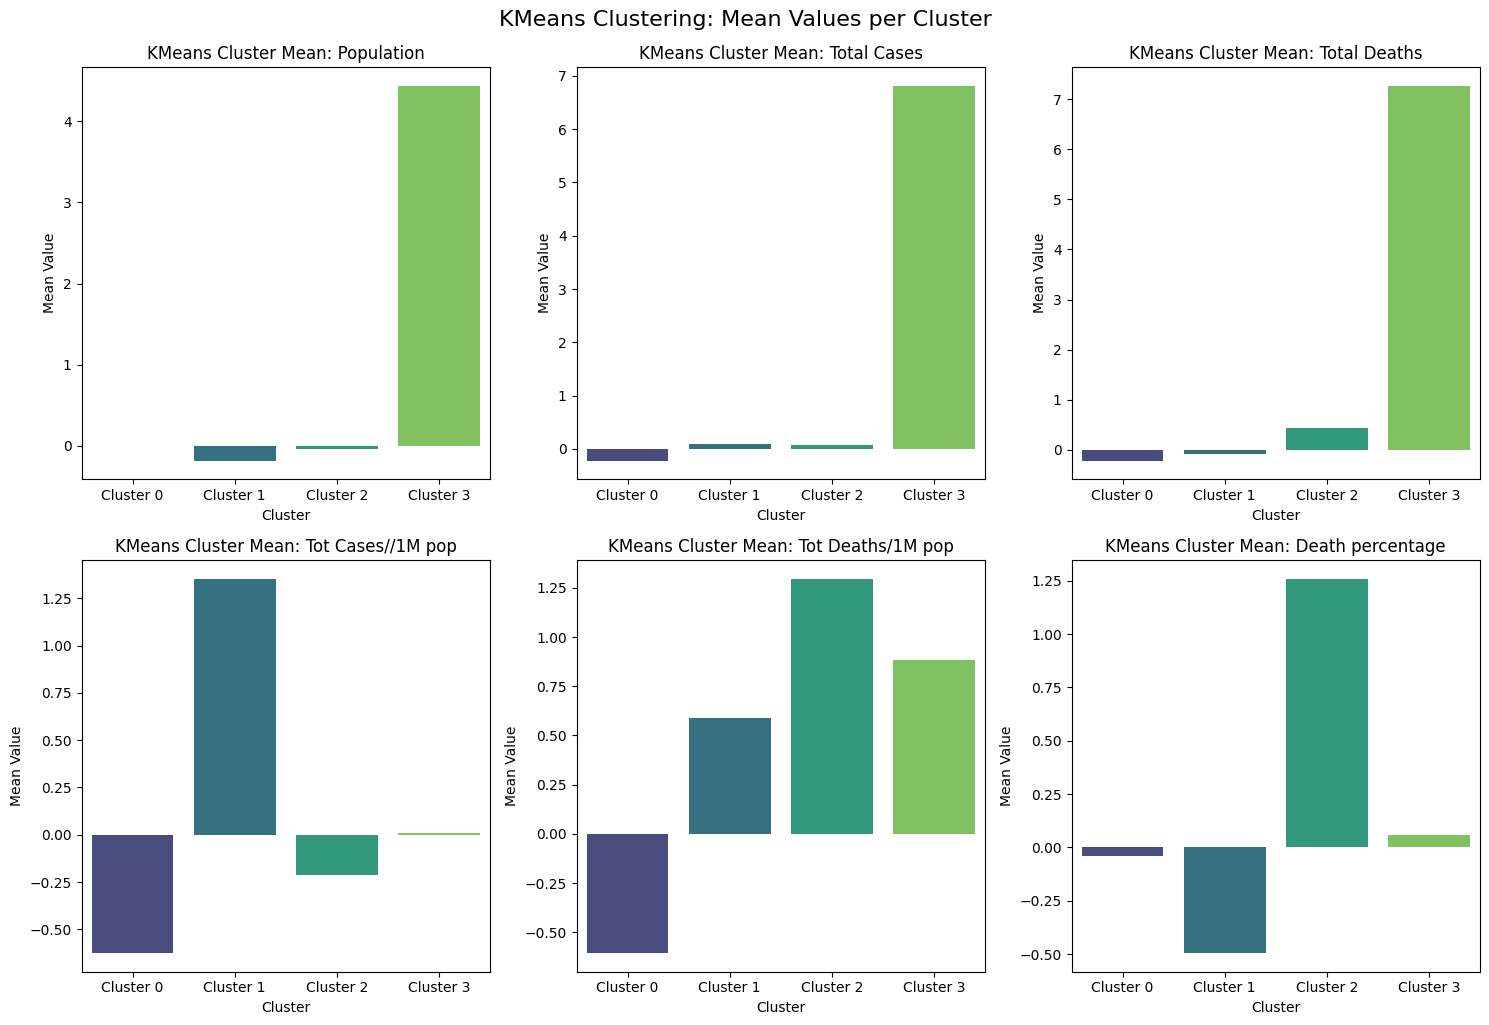

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for KMeans bar plots
kmeans_mean_summary = kmeans_summary[[col for col in kmeans_summary.columns if '_mean' in col]].copy()
kmeans_mean_summary.columns = [col.replace('_mean', '') for col in kmeans_mean_summary.columns]
kmeans_mean_summary = kmeans_mean_summary.T.reset_index()

# Ensure optimal_clusters is available from the KMeans cell (it is 4)
# If not explicitly defined here, it should be in the kernel's memory after running the KMeans cell.
# Let's get the number of clusters from the kmeans_summary index length
optimal_clusters = len(kmeans_summary.index)

kmeans_mean_summary.columns = ['Metric'] + [f'Cluster {i}' for i in range(optimal_clusters)]

print("KMeans Mean Summary for Plotting:")
print(kmeans_mean_summary)

# Prepare cluster labels for plotting
cluster_labels = [f'Cluster {i}' for i in range(optimal_clusters)]

# Plot KMeans cluster means
plt.figure(figsize=(15, 10))
num_metrics = len(kmeans_mean_summary)
# Adjust subplot grid: 2 rows, ceil(num_metrics/2) columns
cols_for_grid = (num_metrics + 1) // 2

for i, metric_name in enumerate(kmeans_mean_summary['Metric']):
    plt.subplot(2, cols_for_grid, i + 1)
    metric_values = kmeans_mean_summary[kmeans_mean_summary['Metric'] == metric_name].iloc[0, 1:].values
    sns.barplot(x=cluster_labels, y=metric_values, palette='viridis')
    plt.title(f'KMeans Cluster Mean: {metric_name}')
    plt.ylabel('Mean Value')
    plt.xlabel('Cluster')
plt.tight_layout()
plt.suptitle('KMeans Clustering: Mean Values per Cluster', y=1.02, fontsize=16)
plt.show()

Hierarchical Agglomerative Clustering Mean Summary for Plotting:
              Metric  Cluster 0  Cluster 1
0         Population  -0.009618   2.154487
1        Total Cases  -0.048982  10.972039
2       Total Deaths  -0.045290  10.144935
3  Tot Cases//1M pop  -0.003326   0.745028
4  Tot Deaths/1M pop  -0.007178   1.607875
5   Death percentage   0.000545  -0.122086


/tmp/ipython-input-4064202341.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4064202341.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4064202341.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4064202341.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4064202341.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

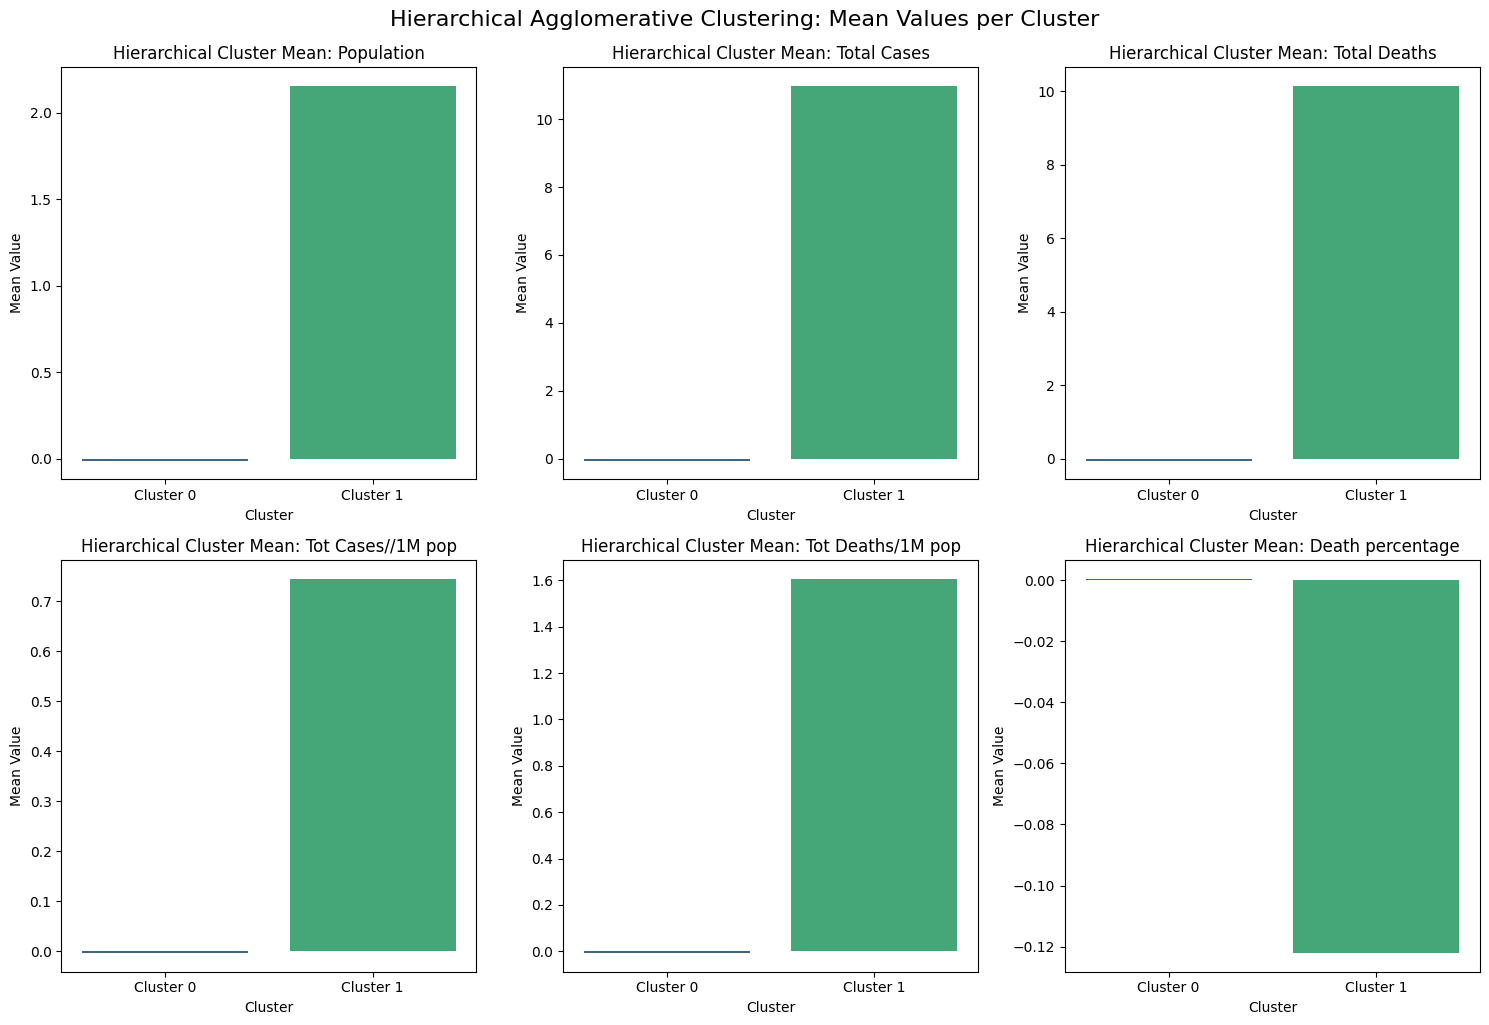

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for Hierarchical Agglomerative Clustering bar plots
hierarchical_mean_summary = hierarchical_summary[[col for col in hierarchical_summary.columns if '_mean' in col]].copy()
hierarchical_mean_summary.columns = [col.replace('_mean', '') for col in hierarchical_mean_summary.columns]
hierarchical_mean_summary = hierarchical_mean_summary.T.reset_index()

# Determine the number of clusters from the hierarchical_summary index length
num_hierarchical_clusters = len(hierarchical_summary.index)

hierarchical_mean_summary.columns = ['Metric'] + [f'Cluster {i}' for i in range(num_hierarchical_clusters)]

print("Hierarchical Agglomerative Clustering Mean Summary for Plotting:")
print(hierarchical_mean_summary)

# Prepare cluster labels for plotting
hierarchical_cluster_labels = [f'Cluster {i}' for i in range(num_hierarchical_clusters)]

# Plot Hierarchical Agglomerative Clustering cluster means
plt.figure(figsize=(15, 10))
num_metrics_hierarchical = len(hierarchical_mean_summary)
cols_for_grid_hierarchical = (num_metrics_hierarchical + 1) // 2

for i, metric_name in enumerate(hierarchical_mean_summary['Metric']):
    plt.subplot(2, cols_for_grid_hierarchical, i + 1)
    metric_values_hierarchical = hierarchical_mean_summary[hierarchical_mean_summary['Metric'] == metric_name].iloc[0, 1:].values
    sns.barplot(x=hierarchical_cluster_labels, y=metric_values_hierarchical, palette='viridis')
    plt.title(f'Hierarchical Cluster Mean: {metric_name}')
    plt.ylabel('Mean Value')
    plt.xlabel('Cluster')
plt.tight_layout()
plt.suptitle('Hierarchical Agglomerative Clustering: Mean Values per Cluster', y=1.02, fontsize=16)
plt.show()

Hierarchical Agglomerative Clustering Mean Summary for Plotting:
              Metric  Cluster 0  Cluster 1
0         Population  -0.009618   2.154487
1        Total Cases  -0.048982  10.972039
2       Total Deaths  -0.045290  10.144935
3  Tot Cases//1M pop  -0.003326   0.745028
4  Tot Deaths/1M pop  -0.007178   1.607875
5   Death percentage   0.000545  -0.122086


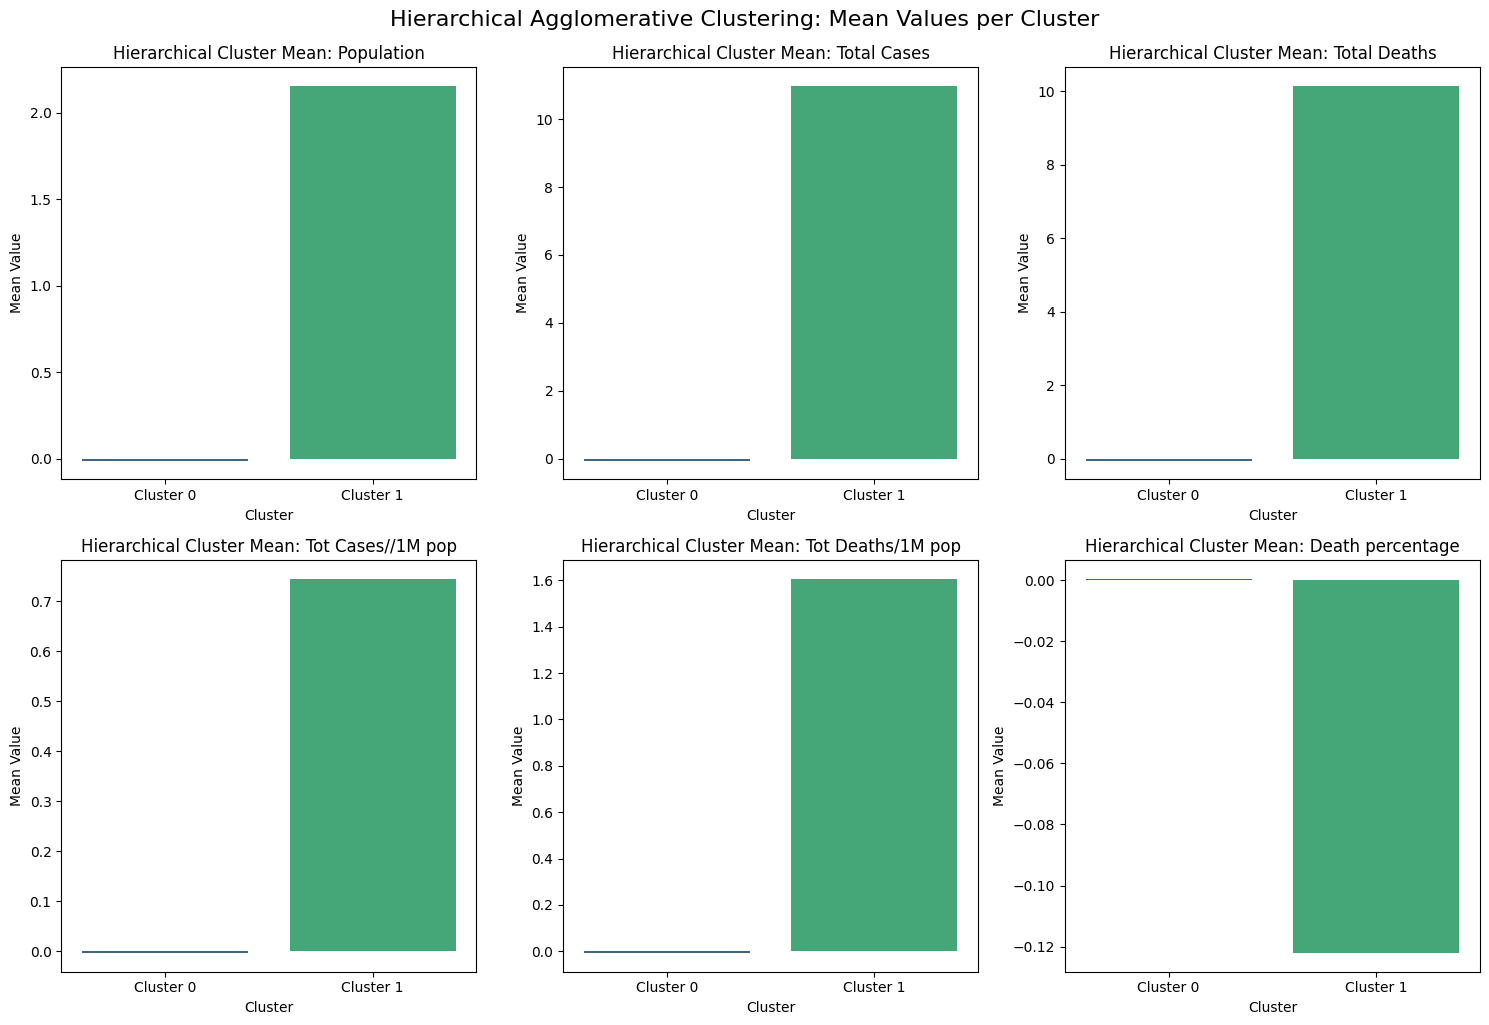

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for Hierarchical Agglomerative Clustering bar plots
hierarchical_mean_summary = hierarchical_summary[[col for col in hierarchical_summary.columns if '_mean' in col]].copy()
hierarchical_mean_summary.columns = [col.replace('_mean', '') for col in hierarchical_mean_summary.columns]
hierarchical_mean_summary = hierarchical_mean_summary.T.reset_index()

# Determine the number of clusters from the hierarchical_summary index length
num_hierarchical_clusters = len(hierarchical_summary.index)

hierarchical_mean_summary.columns = ['Metric'] + [f'Cluster {i}' for i in range(num_hierarchical_clusters)]

print("Hierarchical Agglomerative Clustering Mean Summary for Plotting:")
print(hierarchical_mean_summary)

# Prepare cluster labels for plotting
hierarchical_cluster_labels = [f'Cluster {i}' for i in range(num_hierarchical_clusters)]

# Plot Hierarchical Agglomerative Clustering cluster means
plt.figure(figsize=(15, 10))
num_metrics_hierarchical = len(hierarchical_mean_summary)
cols_for_grid_hierarchical = (num_metrics_hierarchical + 1) // 2

for i, metric_name in enumerate(hierarchical_mean_summary['Metric']):
    plt.subplot(2, cols_for_grid_hierarchical, i + 1)
    metric_values_hierarchical = hierarchical_mean_summary[hierarchical_mean_summary['Metric'] == metric_name].iloc[0, 1:].values
    sns.barplot(x=hierarchical_cluster_labels, y=metric_values_hierarchical, hue=hierarchical_cluster_labels, palette='viridis', legend=False)
    plt.title(f'Hierarchical Cluster Mean: {metric_name}')
    plt.ylabel('Mean Value')
    plt.xlabel('Cluster')
plt.tight_layout()
plt.suptitle('Hierarchical Agglomerative Clustering: Mean Values per Cluster', y=1.02, fontsize=16)
plt.show()

## World Map for K-Means Clusters

In [57]:
import plotly.express as px

fig = px.choropleth(df,
                    locations='ISO 3166-1 alpha-3 CODE',
                    color='KMeans_Cluster',
                    hover_name='Country',
                    projection='natural earth',
                    title='K-Means Clustering: World Map of Countries by Cluster',
                    color_continuous_scale='viridis') # Using a sequential color scale for clusters

fig.show()

## World Map for Hierarchical Clusters

In [58]:
import plotly.express as px

fig = px.choropleth(df,
                    locations='ISO 3166-1 alpha-3 CODE',
                    color='Hierarchical_Cluster',
                    hover_name='Country',
                    projection='natural earth',
                    title='Hierarchical Clustering: World Map of Countries by Cluster',
                    color_continuous_scale='plasma') # Using a sequential color scale for clusters

fig.show()

## Cluster Profiling and Recommendations

## Summary:

### Data Analysis Key Findings

*   **Hierarchical Clustering Profiling**: Bar plots were successfully generated, visualizing the mean values of numerical features for two identified hierarchical clusters (Cluster 0 and Cluster 1). This visualization allows for a direct comparison of feature characteristics between the clusters.
*   **K-Means Cluster Geographical Distribution**: A world map was created, effectively displaying countries colored by their assigned K-Means cluster, providing a geographical perspective on the clustering results.
*   **Hierarchical Cluster Geographical Distribution**: Similarly, a world map was generated, illustrating countries colored by their Hierarchical Agglomerative cluster assignment, allowing for geographical interpretation of this clustering method.

### Insights or Next Steps

*   Analyze the specific numerical feature differences between Hierarchical Clusters 0 and 1 (from the bar plots) to develop a detailed profile for each cluster and then formulate targeted government policy recommendations.
*   Compare the geographical distribution patterns observed in the K-Means and Hierarchical clustering world maps to understand the spatial implications of each clustering approach and identify any shared or distinct regional groupings.


## Cluster Profiling and Government Policy Recommendations

### KMeans Clustering Analysis and Policy Recommendations

#### KMeans Cluster 0: 'Negara dengan Dampak Rendah dan Risiko Potensial'

**Karakteristik:** Cluster ini mencakup sebagian besar negara, ditandai dengan nilai rata-rata dan median yang umumnya rendah di semua metrik dampak COVID-19 numerik (Total Kasus, Total Kematian, Kasus/1 Juta Penduduk, Kematian/1 Juta Penduduk). Meskipun angka totalnya rendah, persentase kematiannya sedikit di atas rata-rata (medan -0.03). Interpretasi visual dari peta dunia K-Means menunjukkan bahwa banyak negara di Afrika dan beberapa bagian Asia serta Oseania termasuk dalam kategori ini, biasanya dengan intensitas warna yang lebih terang, menunjukkan dampak absolut yang lebih rendah.

**Rekomendasi Kebijakan:**

*   **Perkuat Infrastruktur Kesehatan Dasar:** Fokus pada peningkatan akses pelayanan kesehatan dasar, kapasitas pengujian diagnostik (terutama PCR), dan sistem pelaporan data yang akurat. Persentase kematian yang sedikit lebih tinggi mungkin mengindikasikan adanya pelaporan kasus yang kurang lengkap atau akses terbatas terhadap perawatan medis lanjutan.
*   **Pencegahan Tingkat Komunitas:** Tekankan pada tindakan kesehatan masyarakat dasar seperti kebersihan, sanitasi, dan kampanye kesadaran komunitas untuk mencegah penyebaran luas di daerah dengan sumber daya kesehatan yang terbatas.
*   **Akses dan Distribusi Vaksin:** Prioritaskan akses yang merata terhadap vaksin dan pastikan saluran distribusi yang kuat, terutama di daerah pedesaan dan terpencil, untuk mencegah wabah di masa depan membebani sistem kesehatan yang masih berkembang.
*   **Surveilans Bertarget:** Terapkan surveilans bertarget di komunitas berisiko tinggi untuk dengan cepat mengidentifikasi dan menahan wabah.

#### KMeans Cluster 1: 'Negara dengan Tingkat Penularan Per-Kapita Tinggi'

**Karakteristik:** Cluster ini terdiri dari negara-negara dengan nilai rata-rata 'Total Kasus per 1 Juta Penduduk' yang sangat tinggi (1.35 standar deviasi di atas rata-rata) dan 'Total Kematian per 1 Juta Penduduk' yang tinggi (0.59 standar deviasi di atas rata-rata), meskipun populasi total relatif rendah. Persentase kematian adalah yang terendah di antara semua cluster (medan -0.49). Ini menunjukkan bahwa negara-negara ini mungkin memiliki tingkat pengujian yang ekstensif, deteksi dini, atau populasi yang lebih muda, serta sistem kesehatan yang efektif dalam mengelola kasus dan menjaga tingkat kematian relatif rendah.

**Rekomendasi Kebijakan:**

*   **Pertahankan Tindakan Kesehatan Masyarakat Efektif:** Lanjutkan dan perkuat langkah-langkah seperti pelacakan kontak, isolasi, dan karantina. Dukung program pengujian massal yang memungkinkan identifikasi cepat kasus asimtomatik.
*   **Kampanye Booster Vaksin dan Surveilans Genomik:** Dorong kampanye vaksinasi booster yang berkelanjutan dan tingkatkan surveilans genomik untuk memantau varian baru virus, yang penting mengingat tingginya tingkat penularan.
*   **Respons Cepat Terhadap Wabah Lokal:** Siapkan tim respons cepat untuk mengendalikan wabah lokal dan mencegah penyebaran lebih lanjut.

#### KMeans Cluster 2: 'Negara dengan Tingkat Kematian Tinggi dan Sistem Kesehatan Rentan'

**Karakteristik:** Cluster ini ditandai dengan persentase kematian tertinggi (rata-rata 1.25 standar deviasi di atas rata-rata) dan 'Total Kematian per 1 Juta Penduduk' yang sangat tinggi (1.29 standar deviasi di atas rata-rata), meskipun 'Total Kasus per 1 Juta Penduduk' berada di sekitar rata-rata. Ini mengindikasikan bahwa ketika kasus terjadi di negara-negara ini, dampaknya terhadap kematian sangat signifikan. Hal ini bisa disebabkan oleh sistem kesehatan yang rentan, populasi lansia yang besar, atau masalah dalam pelaporan kasus (misalnya, hanya kasus parah yang dilaporkan).

**Rekomendasi Kebijakan:**

*   **Peningkatan Kapasitas Perawatan Kritis:** Tingkatkan jumlah tempat tidur ICU, ventilator, dan staf medis terlatih untuk mengatasi kasus parah.
*   **Perlindungan Populasi Rentan:** Terapkan strategi perlindungan yang kuat untuk lansia dan individu dengan kondisi kesehatan yang mendasari, termasuk vaksinasi prioritas dan akses mudah ke perawatan.
*   **Akses Terhadap Perawatan dan Obat-obatan:** Pastikan ketersediaan dan akses yang adil terhadap terapi COVID-19 yang efektif dan obat-obatan yang menyelamatkan jiwa.
*   **Perbaiki Pelaporan Data:** Audit dan tingkatkan sistem pelaporan data untuk memastikan keakuratan dan kelengkapan, terutama dalam menghitung kasus dan kematian.

#### KMeans Cluster 3: 'Negara dengan Dampak Absolut Ekstrem (Populasi Besar)'

**Karakteristik:** Cluster ini terdiri dari negara-negara dengan populasi yang sangat besar dan secara absolut memiliki jumlah 'Total Kasus' dan 'Total Kematian' yang ekstrem (lebih dari 4 standar deviasi di atas rata-rata). Meskipun demikian, metrik per-kapita ('Tot Kasus//1M pop' dan 'Tot Kematian/1M pop') tidak selalu menjadi yang tertinggi, menunjukkan skala populasi yang mempengaruhi angka absolut. Persentase kematiannya sedikit di atas rata-rata.

**Rekomendasi Kebijakan:**

*   **Manajemen Wabah Skala Besar:** Kembangkan dan terapkan strategi manajemen wabah yang mampu menangani penyebaran virus di populasi yang sangat besar, termasuk logistik vaksinasi massal dan manajemen pasokan medis.
*   **Alokasi Sumber Daya Berdasarkan Populasi:** Alokasikan sumber daya kesehatan dan keuangan secara proporsional dengan ukuran populasi dan kepadatan, terutama di pusat-pusat perkotaan.
*   **Kepemimpinan Kesehatan Global:** Negara-negara ini memiliki peran penting dalam kepemimpinan kesehatan global, termasuk dalam pengembangan dan distribusi vaksin serta berbagi data dan praktik terbaik.
*   **Mitigasi Dampak Sosial Ekonomi:** Terapkan kebijakan yang bertujuan untuk mengurangi dampak sosial dan ekonomi dari pandemi pada segmen populasi yang rentan, terutama di daerah padat penduduk.


### Hierarchical Clustering Analysis and Policy Recommendations

#### Hierarchical Cluster 0: 'Negara dengan Dampak Global Relatif Rendah'

**Karakteristik:** Cluster ini mencakup sebagian besar negara di dunia, yang secara keseluruhan memiliki nilai rata-rata dan median yang sangat rendah untuk semua metrik COVID-19 (Populasi, Total Kasus, Total Kematian, Kasus/1 Juta Penduduk, Kematian/1 Juta Penduduk). Persentase kematian di cluster ini mendekati rata-rata (medan 0.0005). Ini menunjukkan bahwa mayoritas negara mengalami dampak COVID-19 yang relatif ringan dalam skala global, baik karena populasi yang lebih kecil, langkah-langkah pencegahan yang efektif, atau faktor lainnya.

**Rekomendasi Kebijakan:**

*   **Pertahankan Kewaspadaan dan Kesiapsiagaan:** Meskipun dampaknya rendah, negara-negara ini harus tetap waspada dan berinvestasi dalam kesiapsiagaan pandemi untuk menghadapi potensi gelombang di masa depan atau varian baru.
*   **Penguatan Sistem Kesehatan Primer:** Fokus pada penguatan layanan kesehatan primer untuk deteksi dini, diagnosis, dan manajemen kasus ringan, serta untuk memelihara program imunisasi rutin.
*   **Pendidikan Kesehatan Masyarakat:** Lanjutkan pendidikan masyarakat tentang pentingnya kebersihan, vaksinasi, dan pencegahan penyakit menular untuk membangun ketahanan komunitas.
*   **Partisipasi dalam Jaringan Kesehatan Global:** Berpartisipasi dalam jaringan kesehatan global untuk berbagi informasi dan sumber daya, serta mendukung upaya kolektif melawan pandemi.

#### Hierarchical Cluster 1: 'Negara dengan Dampak Global Sangat Tinggi (Outlier)'

**Karakteristik:** Cluster ini terdiri dari sangat sedikit negara (kemungkinan satu atau dua) yang menunjukkan nilai rata-rata yang sangat tinggi untuk Populasi, Total Kasus, dan Total Kematian (lebih dari 2 standar deviasi di atas rata-rata untuk Populasi, dan lebih dari 10 standar deviasi di atas rata-rata untuk Total Kasus dan Kematian). Metrik per-kapita ('Tot Kasus//1M pop' dan 'Tot Kematian/1M pop') juga sangat tinggi. Persentase kematian sedikit di bawah rata-rata (-0.12), mungkin menunjukkan bahwa meskipun angka absolutnya masif, sistem kesehatan mereka cukup baik dalam menangani kasus untuk menjaga persentase kematian sedikit lebih rendah dibandingkan rata-rata.

**Rekomendasi Kebijakan:**

*   **Koordinasi Nasional dan Regional yang Kuat:** Membutuhkan koordinasi yang sangat kuat di tingkat nasional dan regional untuk mengelola volume kasus dan kematian yang sangat besar.
*   **Mobilisasi Sumber Daya Skala Besar:** Fokus pada mobilisasi sumber daya kesehatan, logistik, dan keuangan dalam skala besar untuk menopang sistem perawatan kesehatan dan program vaksinasi.
*   **Penelitian dan Pengembangan Terdepan:** Berinvestasi dalam penelitian dan pengembangan vaksin, terapi, dan diagnostik untuk mengatasi tantangan pandemi.
*   **Kepemimpinan dalam Respon Global:** Negara-negara ini, karena skala dampaknya, diharapkan memainkan peran kepemimpinan dalam respons global terhadap pandemi, termasuk berbagi data, keahlian, dan pasokan dengan negara-negara lain.